In [2]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import iminuit
from IPython.display import display, Math, Latex

# **I – Distributions and probabilities:**


## Problem 1.1 (6 points) An electronic device depends on three components each with independent probabilities 0.009, 0.016, and 0.027 of failing per year.


### • What is the probability that the device will not fail in the first year?

In [3]:
probabilities_of_fail_comp = np.array([0.009, 0.016, 0.027])
probabilities_of_not_fail_comp = 1 - probabilities_of_fail_comp

prob_not_fail = np.prod(probabilities_of_not_fail_comp)

print(f"Probability of not failing in the first year: {prob_not_fail}")

Probability of not failing in the first year: 0.948815112


### • After how many years is the probability of failure greater than 50%?

I need to solve the equation:

$P^n = 0.5$ - Where n is the number of years

Take the logarithm of both sides and isolate n:

$n = \frac{log(0.5)}{log(P)}$



In [4]:
years_until_fail = np.log(0.5) / np.log(prob_not_fail)
print(f"Years until failure: {years_until_fail}")

Years until failure: 13.192419527978739


## 1.2 (8 points) A store has 52.8 customers/day, and considers the top 20% busiest days to be. . . busy!

### • What distribution should the number of daily customers follow and why? 
$\textbf{NOT SOLVED}$

# ***II – Error propagation:***

## 2.1 (10 points) You make nine measurements of the speed of sound in water, and obtain as follows:

In [5]:
Speed_of_sound = np.array([1532, 1458, 1499,1394,1432,1565,1474,1440,1597])
speed_error = np.array([67, 55, 74, 129, 84, 19,10, 17, 14])

### • What is the combined result and uncertainty of all your measurements?


In [6]:
def weighted(values, errors):
    weights = 1 / errors**2  # Using p.83 in Barlow
    result = np.sum(values / errors**2) / np.sum(weights)
    error = 1 / np.sqrt(np.sum(weights))
    # error = error* np.sqrt(np.sum(weights**2)) # This is if the data is  independent and identically distributed random variables
    return result, error

combined_result, combined_error = weighted(Speed_of_sound, speed_error)
print(f"Combined result: {combined_result:.2f} +- {combined_error:.2f}")


Combined result: 1508.28 +- 6.70


### • How much does adding the first five measurements improve the precision compared to the last four?

In [7]:

first_five_measurements = Speed_of_sound[:5]
first_five_errors = speed_error[:5]

last_four_measurements = Speed_of_sound[-4:]
last_four_errors = speed_error[-4:]

result_first_five, error_first_five = weighted(first_five_measurements, first_five_errors)

result_last_four, error_last_four = weighted(last_four_measurements, last_four_errors)

print(f"Combined result for first five measurements: {result_first_five:.2f} +- {error_first_five:.2f}")
print(f"Combined result for last four measurements: {result_last_four:.2f} +- {error_last_four:.2f}")

improvement = result_last_four / result_first_five
print(f"Improvement in precision: {improvement:.2f} times")

Combined result for first five measurements: 1475.53 +- 32.66
Combined result for last four measurements: 1509.72 +- 6.85
Improvement in precision: 1.02 times


# ***III – Simulation / Monte Carlo:***

### 3.1  (10 points) You shoot a penalty, and the probability of scoring depends on the position x (in m)you hit, as pscore = |x|/4 m for |x| < 4 m and zero otherwise (outside goal). Assume the ball hits the goal where you aim with an uncertainty of one meter 

In [8]:
from scipy.stats import norm

r = np.random
r.seed(42)
# Parameters
aim_x = 2.5  # Aiming position (m)
uncertainty = 1.0  # Standard deviation of aiming uncertainty (m)
n_shots = 1000  # Number of Monte Carlo simulations

# Simulate shots
actual_hits = np.random.normal(aim_x, uncertainty, n_shots)  # Actual hit positions

def p_score(x):
    if abs(x) < 4:
        return abs(x)/4
    else:
        return 0


def simulate_scoring(x, sigma_x, num_shots):
    actual_hits = np.random.normal(x, sigma_x, num_shots)  # Actual hit positions

    pscore = np.array([p_score(x) for x in actual_hits])  # Scoring probabilities

    scores = np.random.uniform(0, 1, num_shots) < pscore  # Randomly decide if each shot scores

    chance_of_scoring = np.mean(scores) #Average of the scores
 
    return chance_of_scoring

chance_of_scoring = simulate_scoring(aim_x, uncertainty, n_shots)

print(f"Chance of scoring for x = {aim_x} +- {uncertainty} is p = {chance_of_scoring:.4f}")


Chance of scoring for x = 2.5 +- 1.0 is p = 0.5510


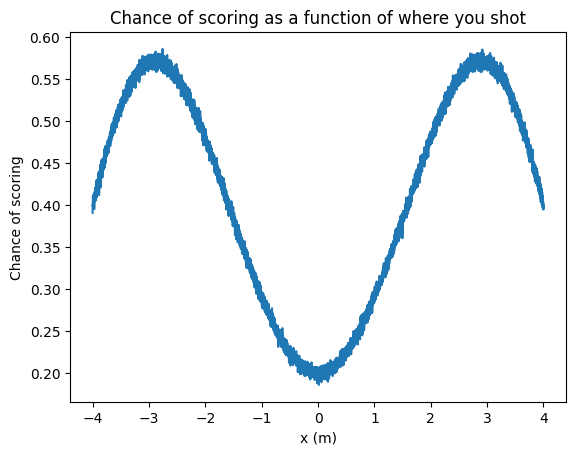

Best shot is at x = -2.76


In [ ]:
#Highest probability of scoring:
x_shots = np.linspace(-4, 4, 10000)
p_scores = np.array([simulate_scoring(x, 1, len(x_shots)) for x in x_shots])

plt.plot(x_shots, p_scores)
plt.xlabel("x (m)")
plt.ylabel("Chance of scoring")
plt.title("Chance of scoring as a function of where you shot")
plt.show()


In [13]:
x_best_shot = x_shots[np.argmax(p_scores)]
print(f"Best shot is at x = {x_best_shot:.2f} and {abs(x_best_shot):.2f}")

Best shot is at x = -2.76 and 2.76


### 4

brug logistisk fit til den data med lande

# 5.2 Brug eksponential og gauss